###Importing the required libraries

In [10]:
import os
import tensorflow as tf
import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import numpy as np
from matplotlib import image as im
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

Mounting the google drive for accessin the dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


## Changing the directory where data is stored and assigning the paths of each dataset

In [3]:
%cd /content/gdrive/MyDrive/A2

/content/gdrive/MyDrive/A2


In [4]:
train_data="train/"
test_data="test/"
validation_data="validate/"

### **Showing sample of each type of flower**

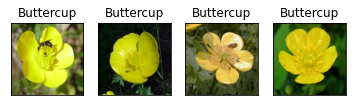

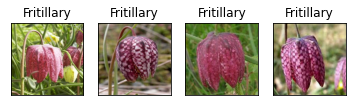

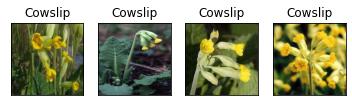

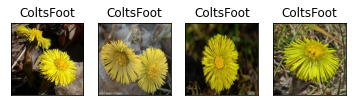

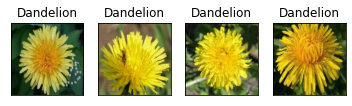

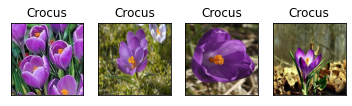

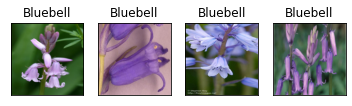

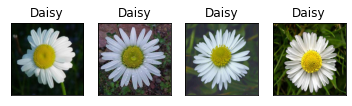

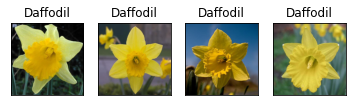

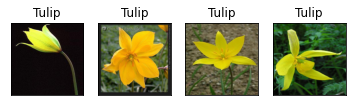

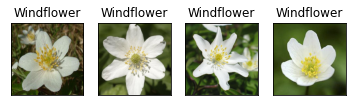

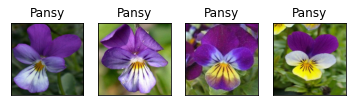

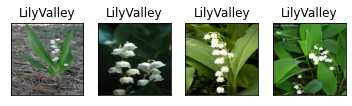

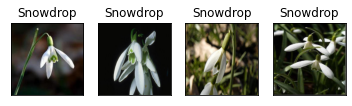

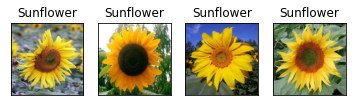

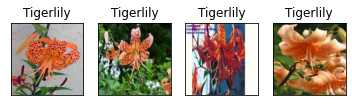

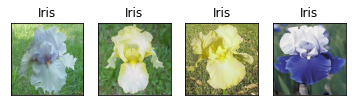

In [ ]:

for i in os.listdir(train_data):
  path=train_data+"/"+i
  k=1
 
  count=0
  image_count=0
  images=[]
  for j in os.listdir(path):
    if (image_count<4):
      image_path=path+"/"+j
      image =load_img(image_path, target_size=(500, 500,3))
      x=im.imread(image_path)
      images.append(image)
      image_count+=1
    count+=1

 # print(i,"has {} images in training data".format(count))
  fig,ax= plt.subplots(1,4)
  plt.setp(ax, xticks=[], xticklabels=[],
        yticks=[])
  for t in range(4):
    ax[t].imshow(images[t])
    ax[t].set_title(i)
  plt.show()

### ***Data Augmentation***

In [5]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      horizontal_flip = True,
      fill_mode="nearest",
      width_shift_range = 0.2, 
      height_shift_range = 0.2 )  

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(    
        test_data,
        target_size=(224,224),
        batch_size=20,
        class_mode='categorical')

train_generator = train_datagen.flow_from_directory( 
        train_data,  
        target_size=(224,224),  
        batch_size=20, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(    
        validation_data,
        target_size=(224,224),
        batch_size=20,
        class_mode='categorical')

Found 340 images belonging to 17 classes.
Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


### **Importing and loading VGG16 with imagenet as weights**

In [6]:
from keras.applications import VGG16 
conv_base_final=VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))

58892288/58889256 [==============================] - 1s 0us/step


# Final Model Selected after all the Experiments 
(Experiments results available in the notebook)**


Using only the first 14 layers of the VGG 16 for the model

In [17]:
model_new_final = models.Sequential()
for layer in conv_base_final.layers[:15]:
  model_new_final.add(layer)

Freezing the first 10 layers

In [18]:
for layer in model_new_final.layers[:8]:
  layer.trainable=False

In [19]:
model_new_final.add(Dropout(0.5))
model_new_final.add(layers.Flatten())
model_new_final.add(layers.Dense(256, activation='relu'))
#model_new_final.add(Dropout(0.2))
#model_new_final.add(layers.Dense(128, activation='relu'))
model_new_final.add(layers.Dense(17, activation='softmax'))

In [ ]:
model_new_final.summary()

In [20]:
checkpoint_path='/content/gdrive/MyDrive/last.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_acc", verbose=0, save_best_only=True, save_weights_only=False,period=1)

In [21]:
model_new_final.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
            metrics=['acc'])

history_fr= model_new_final.fit_generator(train_generator,
    steps_per_epoch=34, 
      epochs=70,
      validation_data=validation_generator,
      validation_steps=17, 
      verbose=2, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
34/34 - 15s - loss: 1.7164 - acc: 0.4868 - val_loss: 0.6738 - val_acc: 0.8029
Epoch 2/70
34/34 - 14s - loss: 0.4119 - acc: 0.8794 - val_loss: 0.5063 - val_acc: 0.8618
Epoch 3/70
34/34 - 14s - loss: 0.1785 - acc: 0.9471 - val_loss: 0.5494 - val_acc: 0.8559
Epoch 4/70
34/34 - 14s - loss: 0.1265 - acc: 0.9647 - val_loss: 0.5755 - val_acc: 0.8529
Epoch 5/70
34/34 - 13s - loss: 0.1601 - acc: 0.9485 - val_loss: 0.6362 - val_acc: 0.8676
Epoch 6/70
34/34 - 14s - loss: 0.1457 - acc: 0.9559 - val_loss: 0.5529 - val_acc: 0.8824
Epoch 7/70
34/34 - 14s - loss: 0.1019 - acc: 0.9691 - val_loss: 0.6366 - val_acc: 0.8647
Epoch 8/70
34/34 - 14s - loss: 0.2509 - acc: 0.9353 - val_loss: 0.7856 - val_acc: 0.8412
Epoch 9/70
34/34 - 13s - loss: 0.1153 - acc: 0.9750 - val_loss: 0.6640 - val_acc: 0.8735
Epoch 10/70
34/34 - 14s - loss: 0.0680 - acc: 0.9765 - val_loss: 0.4936 - val_acc: 0.8941
Epoch 11/70
34/34 - 14s - loss: 0.0378 - acc: 0.9897 - val_loss: 0.4565 - val_acc: 0.9118
Epoch 12/70
34/34 -

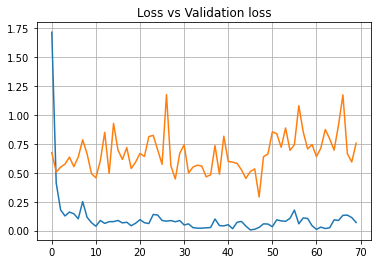

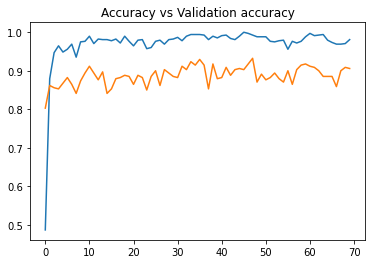

In [22]:
acc = history_fr.history['acc']
val_acc = history_fr.history['val_acc']
loss = history_fr.history['loss']
val_loss = history_fr.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Loss vs Validation loss")
plt.grid()
plt.show()
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Accuracy vs Validation accuracy")

plt.show()

### **Final** model from loading the weights

In [23]:
loaded_model = tf. keras. models. load_model("/content/gdrive/MyDrive/last.48-0.29.hdf5")
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [24]:
loaded_model.evaluate(test_generator)

17/17 [==============================] - 59s 4s/step - loss: 0.3513 - acc: 0.9147


[0.35134416818618774, 0.9147058725357056]

# **Showing** Misclasified images

Bluebell 0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


image_0268.jpg


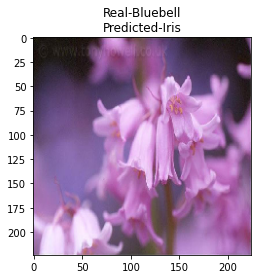

image_0246.jpg


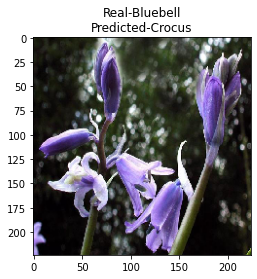

image_0291.jpg


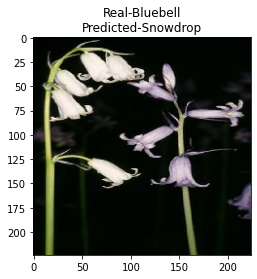

image_0286.jpg


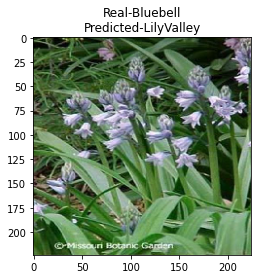

image_0308.jpg


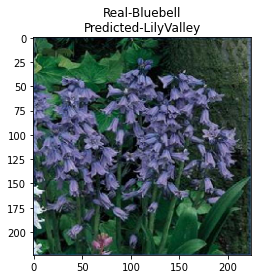

[ 0.  4.  9. 10. 12.]
[15  1  1  2  1]
Fritillary 8
image_0653.jpg


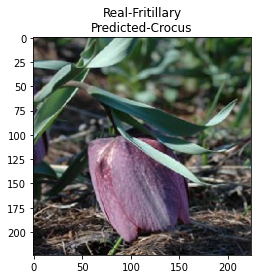

image_0697.jpg


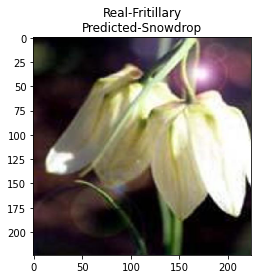

[ 4.  8. 12.]
[ 1 18  1]
Cowslip 3
image_1068.jpg


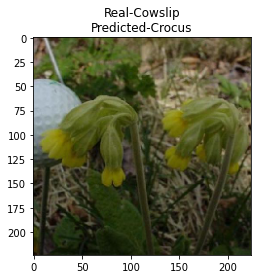

image_1044.jpg


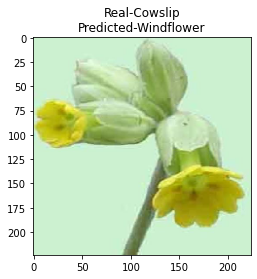

image_1060.jpg


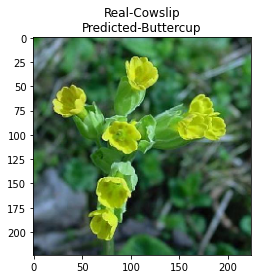

image_1097.jpg


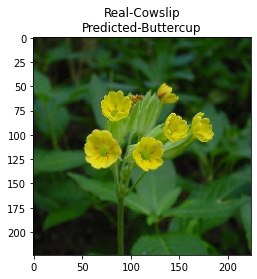

image_1086.jpg


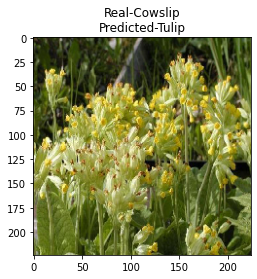

[ 1.  3.  4. 15. 16.]
[ 2 15  1  1  1]
Buttercup 1
image_1180.jpg


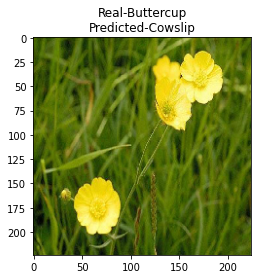

[1. 3.]
[19  1]
ColtsFoot 2
image_0940.jpg


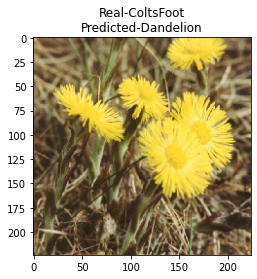

[2. 7.]
[19  1]
Daisy 6
[6.]
[20]
Daffodil 5
image_0054.jpg


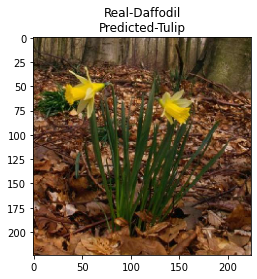

image_0013.jpg


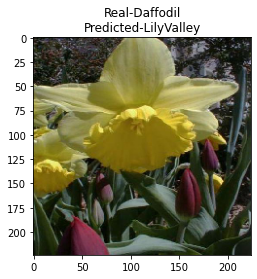

[ 5. 10. 15.]
[18  1  1]
Iris 9
[9.]
[20]
Dandelion 7
image_1014.jpg


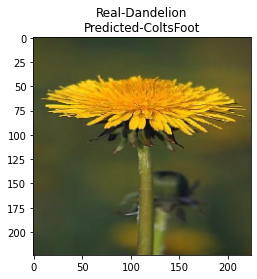

image_1028.jpg


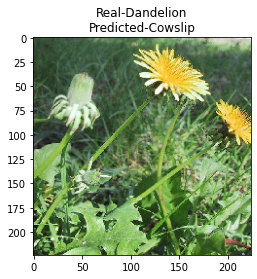

[2. 3. 7.]
[ 1  1 18]
Crocus 4
image_0348.jpg


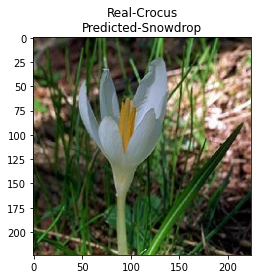

image_0397.jpg


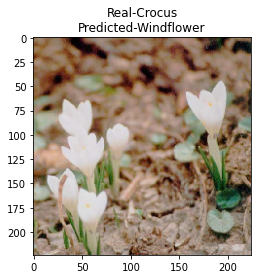

[ 4. 12. 16.]
[18  1  1]
Snowdrop 12
image_0148.jpg


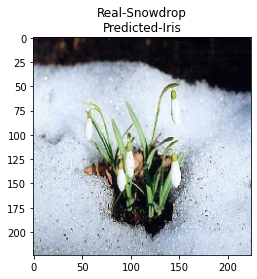

[ 9. 12.]
[ 1 19]
Pansy 11
[11.]
[20]
Tigerlily 14
image_0543.jpg


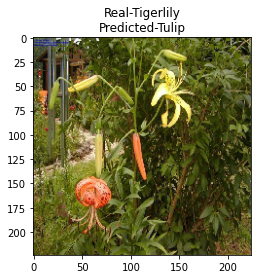

[14. 15.]
[19  1]
Sunflower 13
[13.]
[20]
LilyValley 10
image_0164.jpg


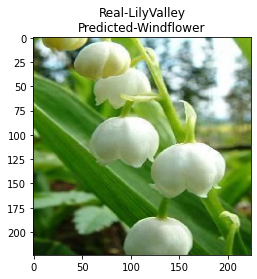

image_0197.jpg


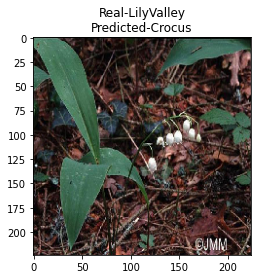

image_0183.jpg


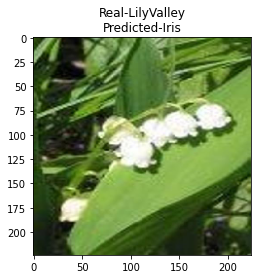

[ 4.  9. 10. 16.]
[ 1  1 17  1]
Tulip 15
image_0588.jpg


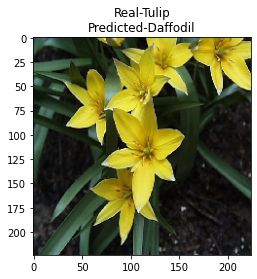

image_0583.jpg


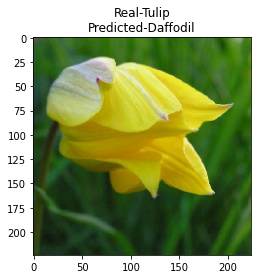

image_0564.jpg


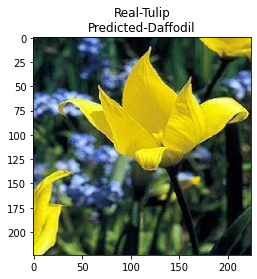

image_0606.jpg


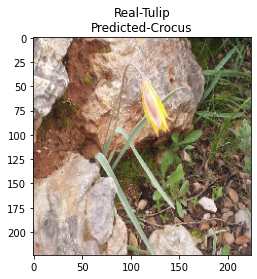

[ 4.  5. 15.]
[ 1  3 16]
Windflower 16
[16.]
[20]


In [26]:
dict_clas= train_generator.class_indices
name_map={
    0:"Bluebell",
    1:"Buttercup",
    2:"ColtsFoot",
    3:"Cowslip",
    4:"Crocus",
    5:"Daffodil",
    6:"Daisy",
    7:"Dandelion",
    8:"Fritillary",
    9:"Iris",
    10:"LilyValley",
    11:"Pansy",
    12:"Snowdrop",
    13:"Sunflower",
    14:"Tigerlily",
    15:"Tulip",
    16:"Windflower",
}
x="/content/gdrive/MyDrive/A2/test"
right=0
total=0
name=[]
pred=[]
real=[]
for i in os.listdir(x):
  print("=============================================================")
  print(i, dict_clas[i])
  y=x+"/"+i
  nan=[]
  table=np.array(nan)
  for j in os.listdir(y):
    z=x+"/"+i+"/"+j
    image = load_img(z, target_size=(224, 224,3))
    d_image=image
    image = img_to_array(image) 
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image=image/255.0
    yhat = loaded_model.predict(image)
    zhat=loaded_model.predict_classes(image)
    d=np.array(yhat[0])
#    print("\t",zhat[0])
    table= np.append(table, zhat[0])
    if (name_map[np.argmax(d)]==i):
    #  print("yes")
      right+=1
      total+=1

    else:
#      print("")
      total+=1
      print(j)
      opp="Real-"+i+"\nPredicted-"+name_map[zhat[0]]
      plt.imshow(d_image)
      plt.title(opp)
      plt.show()
  op=(np.unique(table, return_counts=True))
  print(op[0])
  print(op[1])
    
   

# **Experiment** 1

FC layer 64, dropout-0.5, first 10 layers non trainable, 
popping last 4 convolutional layers one be one and checking which layer needs to be popped
Following is the table of last 10 epochs

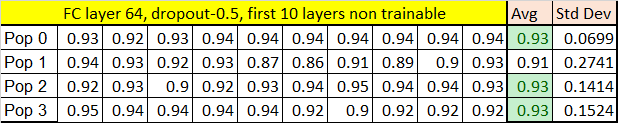

In [ ]:
model_5 = models.Sequential()
for layer in conv_base_final.layers:
  model_5.add(layer)
  
for layer in model_5.layers[:10]:
  layer.trainable=False

In [ ]:
pop_layer_trial=[[],[16],[16,15],[16,15,14]]
keras.backend.clear_session()

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

# model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
overall_acc_dr=[]
overall_val_acc_dr=[]
overall_loss_dr=[]
overall_val_loss_dr=[]
overall_epochs_dr=[]

for x in pop_layer_trial:
  print("layer Popped", x)
  model_pop_conv_layer= models.Sequential()
  for j,layer in enumerate(model_5.layers):
    if j not in x:
      model_pop_conv_layer.add(layer)
  model_pop_conv_layer.add(Dropout(0.5))
  model_pop_conv_layer.add(layers.Flatten())
  model_pop_conv_layer.add(layers.Dense(128, activation='relu'))
  model_pop_conv_layer.add(layers.Dense(17, activation='softmax'))
  checkpoint_path='/content/gdrive/MyDrive/Weights_save_final/weights_final.{epoch:02d}-{val_loss:.2f}.hdf5'
  checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_acc", verbose=0, save_best_only=True, save_weights_only=False,period=1)

  model_pop_conv_layer.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
  
  

  history_fr= model_pop_conv_layer.fit_generator(train_generator,
      steps_per_epoch=34, 
        epochs=10,
        validation_data=validation_generator,
        validation_steps=17, 
        verbose=2, callbacks=[checkpoint])
  
  # print(x,"\n",model_pop_conv_layer.summary())
  acc = history_fr.history['acc']
  val_acc = history_fr.history['val_acc']
  loss = history_fr.history['loss']
  val_loss = history_fr.history['val_loss']
  epochs = range(len(acc))

  overall_acc_dr.append(acc)
  overall_val_acc_dr.append(val_acc)
  overall_loss_dr.append(loss)
  overall_val_loss_dr.append(val_loss)
  overall_epochs_dr.append(epochs)

  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title(str (x))
  plt.show()
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title(str (x))
  plt.show()
  keras.backend.clear_session()

In [ ]:
print("For layer 64")
for i in range(4):
  print("Pop",i,"- ",end="")
  for j in range(20,30):
    print(np.round(10*overall_val_acc_dr[i][j],1),end=",")
  print("\t",np.round(np.average (overall_val_acc_dr[i][20:29]),2))
  print("\n")

For layer 64
Pop 0 - 9.3,9.2,9.3,9.4,9.4,9.4,9.4,9.4,9.4,9.4,	 0.93


Pop 1 - 9.4,9.3,9.2,9.3,8.7,8.6,9.1,8.9,9.0,9.3,	 0.91


Pop 2 - 9.2,9.3,9.0,9.2,9.3,9.4,9.5,9.4,9.4,9.3,	 0.93


Pop 3 - 9.5,9.4,9.4,9.4,9.4,9.2,9.0,9.2,9.2,9.2,	 0.93




## **Experiment** 2

FC layer 256, dropout-0.5, first 10 layers non trainable, 
popping last 4 convolutional layers one be one and checking which layer needs to be popped
Following is the table of last 10 epochs

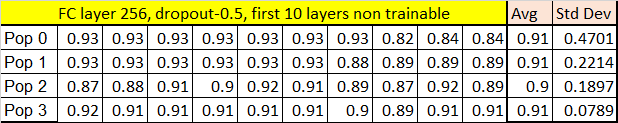

layer Popped [-1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
34/34 - 13s - loss: 1.7533 - acc: 0.8221 - val_loss: 0.4011 - val_acc: 0.9147
Epoch 2/30
34/34 - 12s - loss: 0.0130 - acc: 0.9971 - val_loss: 0.4063 - val_acc: 0.9118
Epoch 3/30
34/34 - 12s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3831 - val_acc: 0.9176
Epoch 4/30
34/34 - 12s - loss: 0.0050 - acc: 0.9985 - val_loss: 0.3784 - val_acc: 0.9118
Epoch 5/30
34/34 - 12s - loss: 4.0986e-04 - acc: 1.0000 - val_loss: 0.3824 - val_acc: 0.9118
Epoch 6/30
34/34 - 12s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4318 - val_acc: 0.9147
Epoch 7/30
34/34 - 12s - loss: 7.6392e-04 - acc: 1.0000 - val_loss: 0.4483 - val_acc: 0.9176
Epoch 8/30
34/34 - 12s - loss: 1.8531e-04 - acc: 1.0000 - val_loss: 0.4649 - val_acc: 0.9235
Epoch 9/30
34/34 - 12s - loss: 3.3809e-04 - acc: 1.0000 - val_loss: 0.4534 - val_acc: 0.9206
Epoch 10/30
34/34 - 12s - loss: 2.4019e-04 - acc: 1.0000 - val_loss: 0.4510 - val_acc: 0.9235
Epoch 11/30
34/34 - 12s - loss: 3.5798e-04 - acc: 1.0000 - val_loss: 0.4454 - val_acc: 0.

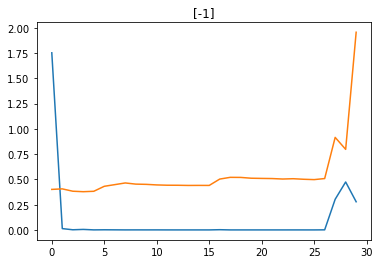

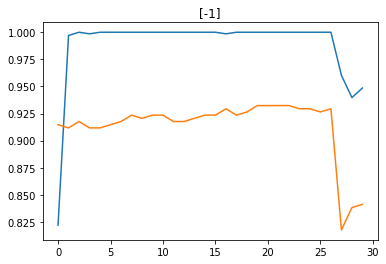

layer Popped [16]
Epoch 1/30
34/34 - 13s - loss: 1.6405 - acc: 0.7471 - val_loss: 0.5103 - val_acc: 0.9059
Epoch 2/30
34/34 - 12s - loss: 0.0478 - acc: 0.9956 - val_loss: 0.5688 - val_acc: 0.9029
Epoch 3/30
34/34 - 12s - loss: 0.0060 - acc: 1.0000 - val_loss: 0.5561 - val_acc: 0.9118
Epoch 4/30
34/34 - 12s - loss: 0.0148 - acc: 0.9971 - val_loss: 0.5594 - val_acc: 0.9088
Epoch 5/30
34/34 - 12s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.5163 - val_acc: 0.9235
Epoch 6/30
34/34 - 12s - loss: 0.0025 - acc: 0.9985 - val_loss: 0.5531 - val_acc: 0.9353
Epoch 7/30
34/34 - 12s - loss: 0.0022 - acc: 0.9985 - val_loss: 0.5363 - val_acc: 0.9265
Epoch 8/30
34/34 - 12s - loss: 0.0085 - acc: 0.9985 - val_loss: 0.5543 - val_acc: 0.9265
Epoch 9/30
34/34 - 12s - loss: 0.0089 - acc: 0.9985 - val_loss: 0.5647 - val_acc: 0.9294
Epoch 10/30
34/34 - 12s - loss: 1.0974e-04 - acc: 1.0000 - val_loss: 0.5847 - val_acc: 0.9265
Epoch 11/30
34/34 - 12s - loss: 0.0038 - acc: 0.9971 - val_loss: 0.7940 - val_acc: 0.92

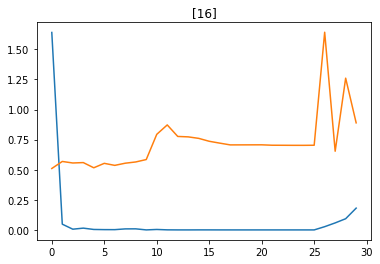

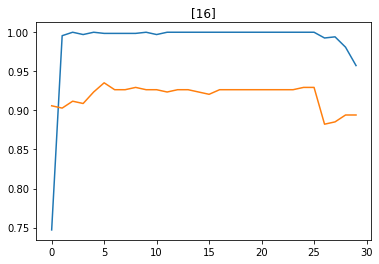

layer Popped [16, 15]
Epoch 1/30
34/34 - 13s - loss: 1.9512 - acc: 0.5853 - val_loss: 0.4247 - val_acc: 0.8824
Epoch 2/30
34/34 - 12s - loss: 0.0883 - acc: 0.9721 - val_loss: 0.4973 - val_acc: 0.8971
Epoch 3/30
34/34 - 12s - loss: 0.0123 - acc: 0.9941 - val_loss: 0.5407 - val_acc: 0.9000
Epoch 4/30
34/34 - 12s - loss: 0.0033 - acc: 0.9985 - val_loss: 0.5352 - val_acc: 0.9059
Epoch 5/30
34/34 - 12s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6163 - val_acc: 0.9118
Epoch 6/30
34/34 - 12s - loss: 5.7910e-04 - acc: 1.0000 - val_loss: 0.6050 - val_acc: 0.9088
Epoch 7/30
34/34 - 12s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6662 - val_acc: 0.9059
Epoch 8/30
34/34 - 12s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6785 - val_acc: 0.9147
Epoch 9/30
34/34 - 12s - loss: 0.0035 - acc: 0.9985 - val_loss: 0.8626 - val_acc: 0.8882
Epoch 10/30
34/34 - 12s - loss: 0.0243 - acc: 0.9941 - val_loss: 0.5274 - val_acc: 0.9147
Epoch 11/30
34/34 - 12s - loss: 0.0042 - acc: 0.9985 - val_loss: 0.5504 - val_acc: 

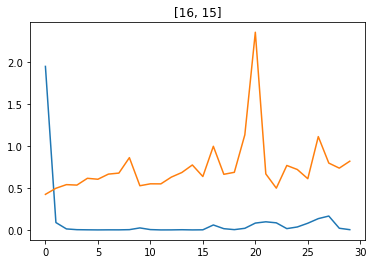

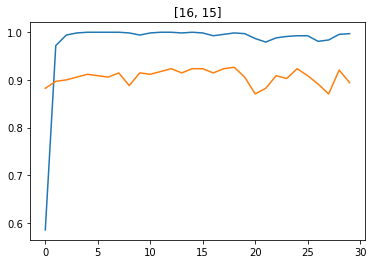

layer Popped [16, 15, 14]
Epoch 1/30
34/34 - 13s - loss: 5.4194 - acc: 0.4250 - val_loss: 0.8198 - val_acc: 0.8147
Epoch 2/30
34/34 - 12s - loss: 0.5264 - acc: 0.8662 - val_loss: 0.5578 - val_acc: 0.8647
Epoch 3/30
34/34 - 12s - loss: 0.1866 - acc: 0.9456 - val_loss: 0.6033 - val_acc: 0.8853
Epoch 4/30
34/34 - 12s - loss: 0.1607 - acc: 0.9618 - val_loss: 0.5447 - val_acc: 0.8941
Epoch 5/30
34/34 - 12s - loss: 0.0795 - acc: 0.9721 - val_loss: 0.5340 - val_acc: 0.8941
Epoch 6/30
34/34 - 12s - loss: 0.0314 - acc: 0.9897 - val_loss: 0.5036 - val_acc: 0.9088
Epoch 7/30
34/34 - 12s - loss: 0.0342 - acc: 0.9912 - val_loss: 0.4725 - val_acc: 0.9147
Epoch 8/30
34/34 - 12s - loss: 0.0168 - acc: 0.9941 - val_loss: 0.5232 - val_acc: 0.9029
Epoch 9/30
34/34 - 12s - loss: 0.0385 - acc: 0.9926 - val_loss: 0.5381 - val_acc: 0.9118
Epoch 10/30
34/34 - 12s - loss: 0.0125 - acc: 0.9971 - val_loss: 0.5773 - val_acc: 0.9118
Epoch 11/30
34/34 - 12s - loss: 0.0230 - acc: 0.9926 - val_loss: 0.5714 - val_acc: 

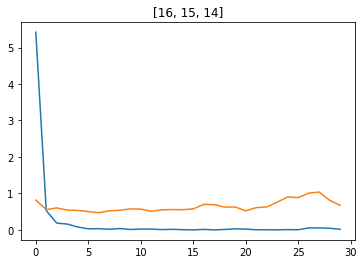

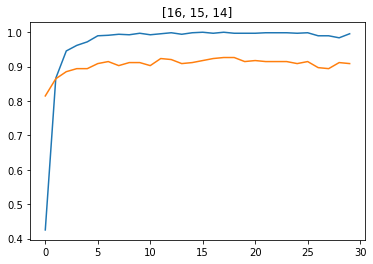

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

# model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
overall_acc_dr=[]
overall_val_acc_dr=[]
overall_loss_dr=[]
overall_val_loss_dr=[]
overall_epochs_dr=[]

for x in pop_layer_trial:
  print("layer Popped", x)
  model_pop_conv_layer= models.Sequential()
  for j,layer in enumerate(model_1.layers):
    if j not in x:
      model_pop_conv_layer.add(layer)
  model_pop_conv_layer.add(Dropout(0.5))
  model_pop_conv_layer.add(layers.Flatten())
  model_pop_conv_layer.add(layers.Dense(256, activation='relu'))
  model_pop_conv_layer.add(layers.Dense(17, activation='softmax'))
  checkpoint_path='/content/gdrive/MyDrive/Weights_save_final/weights_final_128.{epoch:02d}-{val_loss:.2f}.hdf5'
  checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_acc", verbose=0, save_best_only=True, save_weights_only=False,period=1)

  model_pop_conv_layer.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
  
  

  history_fr= model_pop_conv_layer.fit_generator(train_generator,
      steps_per_epoch=34, 
        epochs=30,
        validation_data=validation_generator,
        validation_steps=17, 
        verbose=2, callbacks=[checkpoint])
  
  # print(x,"\n",model_pop_conv_layer.summary())
  acc = history_fr.history['acc']
  val_acc = history_fr.history['val_acc']
  loss = history_fr.history['loss']
  val_loss = history_fr.history['val_loss']
  epochs = range(len(acc))

  overall_acc_dr.append(acc)
  overall_val_acc_dr.append(val_acc)
  overall_loss_dr.append(loss)
  overall_val_loss_dr.append(val_loss)
  overall_epochs_dr.append(epochs)

  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title(str (x))
  plt.show()
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title(str (x))
  plt.show()
  keras.backend.clear_session()

In [ ]:
print("For layer 256")
for i in range(4):
  print("Pop",i,"- ",end="")
  for j in range(20,30):
    print(np.round(10*overall_val_acc_dr[i][j],1),end=",")
  print("\t",np.round(np.average (overall_val_acc_dr[i][20:29]),2))
  print("\n")

For layer 256
Pop 0 - 9.3,9.3,9.3,9.3,9.3,9.3,9.3,8.2,8.4,8.4,	 0.91


Pop 1 - 9.3,9.3,9.3,9.3,9.3,9.3,8.8,8.9,8.9,8.9,	 0.91


Pop 2 - 8.7,8.8,9.1,9.0,9.2,9.1,8.9,8.7,9.2,8.9,	 0.9


Pop 3 - 9.2,9.1,9.1,9.1,9.1,9.1,9.0,8.9,9.1,9.1,	 0.91




## **Experiment** 3

FC layer 256 and 128, dropout-0.5, first 10 layers non trainable, 
popping last 4 convolutional layers one be one and checking which layer needs to be popped
Following is the table of last 10 epochs

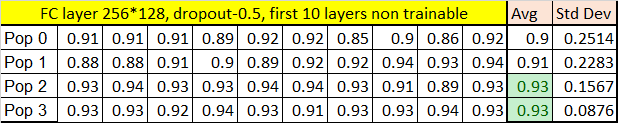

layer Popped [-1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
34/34 - 13s - loss: 1.6414 - acc: 0.7632 - val_loss: 0.6266 - val_acc: 0.8941
Epoch 2/30
34/34 - 12s - loss: 0.0120 - acc: 0.9956 - val_loss: 0.5242 - val_acc: 0.9235
Epoch 3/30
34/34 - 12s - loss: 0.0031 - acc: 0.9985 - val_loss: 0.6085 - val_acc: 0.9265
Epoch 4/30
34/34 - 12s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6210 - val_acc: 0.9147
Epoch 5/30
34/34 - 12s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5936 - val_acc: 0.9235
Epoch 6/30
34/34 - 12s - loss: 1.9416e-04 - acc: 1.0000 - val_loss: 0.5989 - val_acc: 0.9265
Epoch 7/30
34/34 - 12s - loss: 5.2809e-05 - acc: 1.0000 - val_loss: 0.5977 - val_acc: 0.9235
Epoch 8/30
34/34 - 12s - loss: 1.3815e-04 - acc: 1.0000 - val_loss: 0.5854 - val_acc: 0.9206
Epoch 9/30
34/34 - 12s - loss: 7.2546e-05 - acc: 1.0000 - val_loss: 0.5827 - val_acc: 0.9206
Epoch 10/30
34/34 - 12s - loss: 6.8924e-04 - acc: 1.0000 - val_loss: 0.5307 - val_acc: 0.9353
Epoch 11/30
34/34 - 12s - loss: 3.3800e-04 - acc: 1.0000 - val_loss: 0.5442 - val_acc: 0.

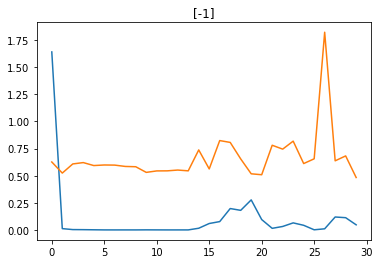

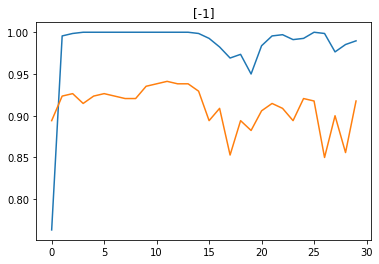

layer Popped [16]
Epoch 1/30
34/34 - 13s - loss: 2.3834 - acc: 0.5103 - val_loss: 0.9567 - val_acc: 0.7676
Epoch 2/30
34/34 - 12s - loss: 0.1869 - acc: 0.9603 - val_loss: 0.4298 - val_acc: 0.9118
Epoch 3/30
34/34 - 12s - loss: 0.0334 - acc: 0.9941 - val_loss: 0.6081 - val_acc: 0.9118
Epoch 4/30
34/34 - 12s - loss: 0.0350 - acc: 0.9956 - val_loss: 0.5184 - val_acc: 0.9382
Epoch 5/30
34/34 - 12s - loss: 0.0063 - acc: 0.9985 - val_loss: 0.4860 - val_acc: 0.9441
Epoch 6/30
34/34 - 12s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4520 - val_acc: 0.9529
Epoch 7/30
34/34 - 12s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.4714 - val_acc: 0.9382
Epoch 8/30
34/34 - 12s - loss: 0.0023 - acc: 0.9985 - val_loss: 0.5325 - val_acc: 0.9294
Epoch 9/30
34/34 - 12s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6137 - val_acc: 0.9353
Epoch 10/30
34/34 - 12s - loss: 3.4525e-04 - acc: 1.0000 - val_loss: 0.6387 - val_acc: 0.9353
Epoch 11/30
34/34 - 12s - loss: 1.1274e-04 - acc: 1.0000 - val_loss: 0.6492 - val_acc: 

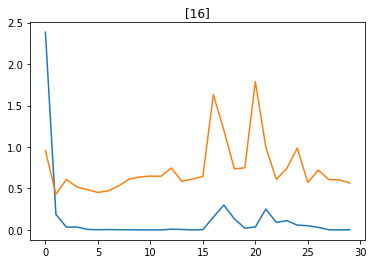

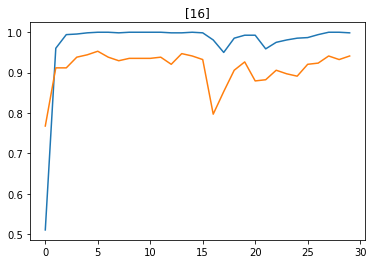

layer Popped [16, 15]
Epoch 1/30
34/34 - 13s - loss: 2.3612 - acc: 0.5029 - val_loss: 0.6489 - val_acc: 0.8382
Epoch 2/30
34/34 - 12s - loss: 0.1479 - acc: 0.9662 - val_loss: 0.4390 - val_acc: 0.9176
Epoch 3/30
34/34 - 12s - loss: 0.0447 - acc: 0.9897 - val_loss: 0.5118 - val_acc: 0.9294
Epoch 4/30
34/34 - 12s - loss: 0.0197 - acc: 0.9971 - val_loss: 0.4163 - val_acc: 0.9382
Epoch 5/30
34/34 - 12s - loss: 0.0217 - acc: 0.9897 - val_loss: 0.5068 - val_acc: 0.9265
Epoch 6/30
34/34 - 12s - loss: 0.0129 - acc: 0.9956 - val_loss: 0.3724 - val_acc: 0.9500
Epoch 7/30
34/34 - 12s - loss: 0.0057 - acc: 0.9985 - val_loss: 0.5351 - val_acc: 0.9382
Epoch 8/30
34/34 - 12s - loss: 0.0026 - acc: 0.9985 - val_loss: 0.5333 - val_acc: 0.9353
Epoch 9/30
34/34 - 12s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.5697 - val_acc: 0.9353
Epoch 10/30
34/34 - 12s - loss: 0.0098 - acc: 0.9985 - val_loss: 0.9204 - val_acc: 0.9118
Epoch 11/30
34/34 - 12s - loss: 0.0238 - acc: 0.9941 - val_loss: 0.8362 - val_acc: 0.91

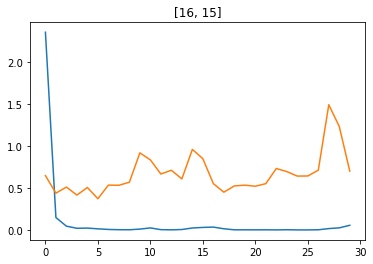

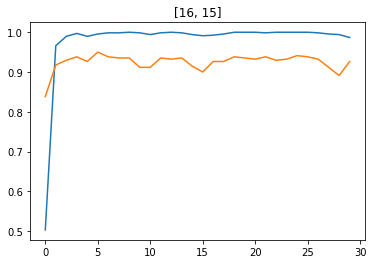

layer Popped [16, 15, 14]
Epoch 1/30
34/34 - 13s - loss: 4.4795 - acc: 0.2662 - val_loss: 1.0686 - val_acc: 0.7000
Epoch 2/30
34/34 - 12s - loss: 0.9907 - acc: 0.6882 - val_loss: 0.4888 - val_acc: 0.8618
Epoch 3/30
34/34 - 12s - loss: 0.4058 - acc: 0.8662 - val_loss: 0.4001 - val_acc: 0.8971
Epoch 4/30
34/34 - 12s - loss: 0.2156 - acc: 0.9426 - val_loss: 0.3625 - val_acc: 0.9029
Epoch 5/30
34/34 - 12s - loss: 0.1777 - acc: 0.9515 - val_loss: 0.3949 - val_acc: 0.9029
Epoch 6/30
34/34 - 12s - loss: 0.0826 - acc: 0.9853 - val_loss: 0.4338 - val_acc: 0.9206
Epoch 7/30
34/34 - 12s - loss: 0.0565 - acc: 0.9809 - val_loss: 0.4838 - val_acc: 0.9029
Epoch 8/30
34/34 - 12s - loss: 0.0527 - acc: 0.9838 - val_loss: 0.5424 - val_acc: 0.9088
Epoch 9/30
34/34 - 12s - loss: 0.0754 - acc: 0.9809 - val_loss: 0.4891 - val_acc: 0.9118
Epoch 10/30
34/34 - 12s - loss: 0.0343 - acc: 0.9868 - val_loss: 0.3997 - val_acc: 0.9176
Epoch 11/30
34/34 - 12s - loss: 0.0484 - acc: 0.9912 - val_loss: 0.4506 - val_acc: 

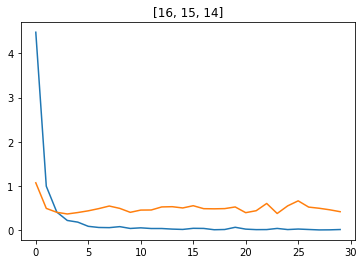

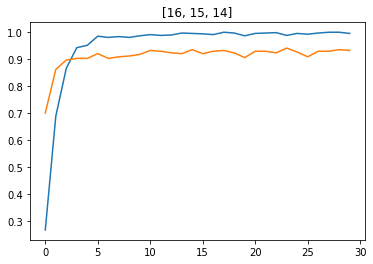

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

# model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
overall_acc_dr=[]
overall_val_acc_dr=[]
overall_loss_dr=[]
overall_val_loss_dr=[]
overall_epochs_dr=[]

for x in pop_layer_trial:
  print("layer Popped", x)
  model_pop_conv_layer= models.Sequential()
  for j,layer in enumerate(model_1.layers):
    if j not in x:
      model_pop_conv_layer.add(layer)
  model_pop_conv_layer.add(Dropout(0.5))
  model_pop_conv_layer.add(layers.Flatten())
  model_pop_conv_layer.add(layers.Dense(256, activation='relu'))
  model_pop_conv_layer.add(layers.Dense(128, activation='relu'))
  
  model_pop_conv_layer.add(layers.Dense(17, activation='softmax'))
  checkpoint_path='/content/gdrive/MyDrive/Weights_save_final/weights_final.{epoch:02d}-{val_loss:.2f}.hdf5'
  checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_acc", verbose=0, save_best_only=True, save_weights_only=False,period=1)

  model_pop_conv_layer.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
  
  

  history_fr= model_pop_conv_layer.fit_generator(train_generator,
      steps_per_epoch=34, 
        epochs=30,
        validation_data=validation_generator,
        validation_steps=17, 
        verbose=2, callbacks=[checkpoint])
  
  # print(x,"\n",model_pop_conv_layer.summary())
  acc = history_fr.history['acc']
  val_acc = history_fr.history['val_acc']
  loss = history_fr.history['loss']
  val_loss = history_fr.history['val_loss']
  epochs = range(len(acc))

  overall_acc_dr.append(acc)
  overall_val_acc_dr.append(val_acc)
  overall_loss_dr.append(loss)
  overall_val_loss_dr.append(val_loss)
  overall_epochs_dr.append(epochs)

  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title(str (x))
  plt.show()
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title(str (x))
  plt.show()
  keras.backend.clear_session()

In [ ]:
# last_10_vall_acc= 
print("For layer 256*128")
for i in range(4):
  print("Pop",i,"- ",end="")
  for j in range(20,30):
    print(np.round(10*overall_val_acc_dr[i][j],1),end=",")
  print("\t",np.round(np.average (overall_val_acc_dr[i][20:29]),2))
  print("\n")

For layer 256*128
Pop 0 - 9.3,9.3,9.3,9.3,9.3,9.3,9.3,8.2,8.4,8.4,	 0.91


Pop 1 - 9.3,9.3,9.3,9.3,9.3,9.3,8.8,8.9,8.9,8.9,	 0.91


Pop 2 - 8.7,8.8,9.1,9.0,9.2,9.1,8.9,8.7,9.2,8.9,	 0.9


Pop 3 - 9.2,9.1,9.1,9.1,9.1,9.1,9.0,8.9,9.1,9.1,	 0.91




## **Experiment** 4

FC layer 512, dropout-0.5, first 10 layers non trainable, 
popping last 4 convolutional layers one be one and checking which layer needs to be popped
Following is the table of last 10 epochs

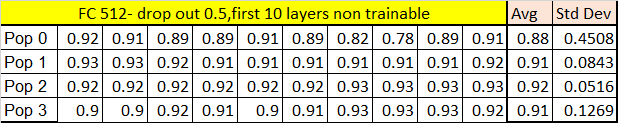

layer Popped [-1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
34/34 - 14s - loss: 1.0637 - acc: 0.8765 - val_loss: 0.5100 - val_acc: 0.8853
Epoch 2/30
34/34 - 13s - loss: 0.0047 - acc: 1.0000 - val_loss: 0.4186 - val_acc: 0.9176
Epoch 3/30
34/34 - 13s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4383 - val_acc: 0.9118
Epoch 4/30
34/34 - 13s - loss: 5.5049e-04 - acc: 1.0000 - val_loss: 0.4577 - val_acc: 0.9088
Epoch 5/30
34/34 - 12s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4580 - val_acc: 0.9206
Epoch 6/30
34/34 - 12s - loss: 5.7418e-05 - acc: 1.0000 - val_loss: 0.4565 - val_acc: 0.9206
Epoch 7/30
34/34 - 12s - loss: 2.1856e-04 - acc: 1.0000 - val_loss: 0.4467 - val_acc: 0.9235
Epoch 8/30
34/34 - 13s - loss: 3.5483e-05 - acc: 1.0000 - val_loss: 0.4457 - val_acc: 0.9235
Epoch 9/30
34/34 - 12s - loss: 1.0556e-04 - acc: 1.0000 - val_loss: 0.4350 - val_acc: 0.9235
Epoch 10/30
34/34 - 12s - loss: 3.1290e-05 - acc: 1.0000 - val_loss: 0.4345 - val_acc: 0.9265
Epoch 11/30
34/34 - 12s - loss: 9.9227e-05 - acc: 1.0000 - val_loss: 0.4380 - val_acc

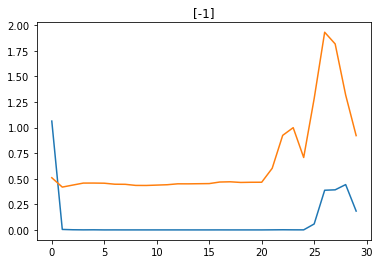

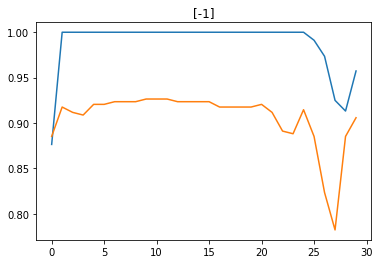

layer Popped [16]
Epoch 1/30
34/34 - 13s - loss: 2.3206 - acc: 0.7456 - val_loss: 0.5372 - val_acc: 0.8588
Epoch 2/30
34/34 - 12s - loss: 0.0786 - acc: 0.9824 - val_loss: 0.4976 - val_acc: 0.8941
Epoch 3/30
34/34 - 13s - loss: 0.0253 - acc: 0.9956 - val_loss: 0.6433 - val_acc: 0.8971
Epoch 4/30
34/34 - 13s - loss: 0.0037 - acc: 0.9985 - val_loss: 0.7847 - val_acc: 0.9000
Epoch 5/30
34/34 - 12s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.8861 - val_acc: 0.8853
Epoch 6/30
34/34 - 12s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6604 - val_acc: 0.8971
Epoch 7/30
34/34 - 12s - loss: 8.5049e-04 - acc: 1.0000 - val_loss: 0.6333 - val_acc: 0.9000
Epoch 8/30
34/34 - 12s - loss: 0.0086 - acc: 0.9985 - val_loss: 1.0357 - val_acc: 0.9088
Epoch 9/30
34/34 - 12s - loss: 0.0280 - acc: 0.9941 - val_loss: 0.6751 - val_acc: 0.8882
Epoch 10/30
34/34 - 12s - loss: 0.0115 - acc: 0.9971 - val_loss: 0.7776 - val_acc: 0.8971
Epoch 11/30
34/34 - 12s - loss: 0.0027 - acc: 0.9985 - val_loss: 0.6727 - val_acc: 0.90

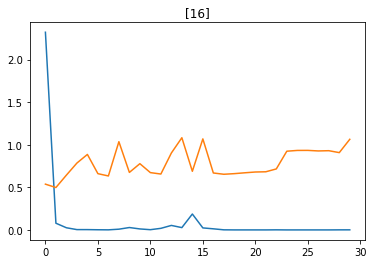

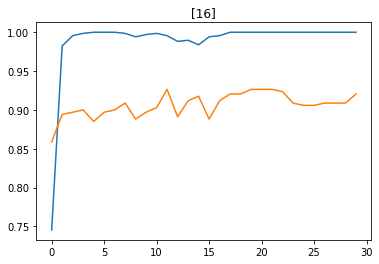

layer Popped [16, 15]
Epoch 1/30
34/34 - 14s - loss: 2.3565 - acc: 0.6706 - val_loss: 0.5408 - val_acc: 0.8588
Epoch 2/30
34/34 - 14s - loss: 0.0594 - acc: 0.9868 - val_loss: 0.5252 - val_acc: 0.8971
Epoch 3/30
34/34 - 13s - loss: 0.0134 - acc: 0.9971 - val_loss: 0.5220 - val_acc: 0.9147
Epoch 4/30
34/34 - 13s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.5006 - val_acc: 0.9176
Epoch 5/30
34/34 - 13s - loss: 0.0047 - acc: 0.9985 - val_loss: 0.4865 - val_acc: 0.9176
Epoch 6/30
34/34 - 12s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5225 - val_acc: 0.9059
Epoch 7/30
34/34 - 12s - loss: 0.0111 - acc: 0.9971 - val_loss: 0.5730 - val_acc: 0.9059
Epoch 8/30
34/34 - 12s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.6031 - val_acc: 0.9059
Epoch 9/30
34/34 - 12s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.5462 - val_acc: 0.9147
Epoch 10/30
34/34 - 12s - loss: 8.9624e-05 - acc: 1.0000 - val_loss: 0.5397 - val_acc: 0.9118
Epoch 11/30
34/34 - 12s - loss: 3.9749e-05 - acc: 1.0000 - val_loss: 0.5344 - val_a

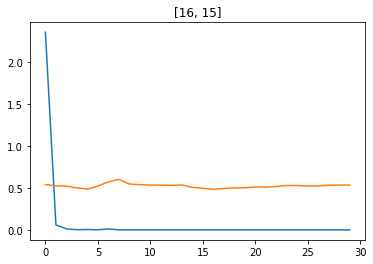

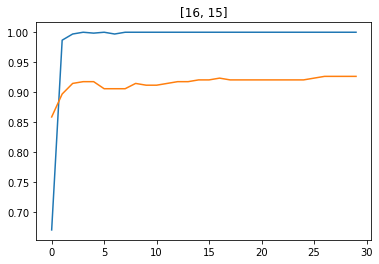

layer Popped [16, 15, 14]
Epoch 1/30
34/34 - 13s - loss: 4.5878 - acc: 0.4868 - val_loss: 0.6426 - val_acc: 0.8500
Epoch 2/30
34/34 - 13s - loss: 0.3129 - acc: 0.9176 - val_loss: 0.4437 - val_acc: 0.8941
Epoch 3/30
34/34 - 13s - loss: 0.1168 - acc: 0.9721 - val_loss: 0.4545 - val_acc: 0.8971
Epoch 4/30
34/34 - 12s - loss: 0.0766 - acc: 0.9794 - val_loss: 0.4294 - val_acc: 0.9000
Epoch 5/30
34/34 - 12s - loss: 0.0586 - acc: 0.9809 - val_loss: 0.4807 - val_acc: 0.9088
Epoch 6/30
34/34 - 13s - loss: 0.0428 - acc: 0.9824 - val_loss: 0.4685 - val_acc: 0.9088
Epoch 7/30
34/34 - 12s - loss: 0.0441 - acc: 0.9868 - val_loss: 0.4933 - val_acc: 0.9176
Epoch 8/30
34/34 - 12s - loss: 0.0285 - acc: 0.9926 - val_loss: 0.4599 - val_acc: 0.9118
Epoch 9/30
34/34 - 12s - loss: 0.0116 - acc: 0.9971 - val_loss: 0.4417 - val_acc: 0.9118
Epoch 10/30
34/34 - 12s - loss: 0.0162 - acc: 0.9971 - val_loss: 0.4532 - val_acc: 0.9059
Epoch 11/30
34/34 - 12s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4594 - val_acc: 

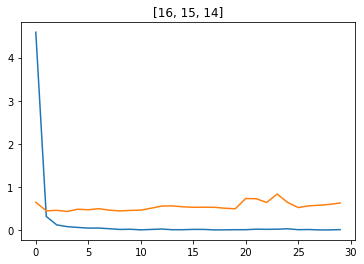

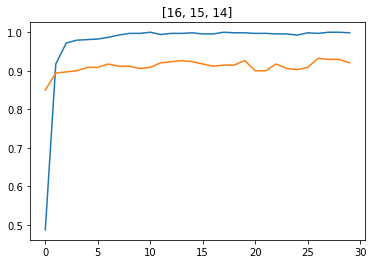

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

# model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
overall_acc_dr=[]
overall_val_acc_dr=[]
overall_loss_dr=[]
overall_val_loss_dr=[]
overall_epochs_dr=[]

for x in pop_layer_trial:
  print("layer Popped", x)
  model_pop_conv_layer= models.Sequential()
  for j,layer in enumerate(model_1.layers):
    if j not in x:
      model_pop_conv_layer.add(layer)
  model_pop_conv_layer.add(Dropout(0.5))
  model_pop_conv_layer.add(layers.Flatten())
  model_pop_conv_layer.add(layers.Dense(512, activation='relu'))
#  model_pop_conv_layer.add(layers.Dense(128, activation='relu'))
  
  model_pop_conv_layer.add(layers.Dense(17, activation='softmax'))
  checkpoint_path='/content/gdrive/MyDrive/Weights_save_final/weights_final.{epoch:02d}-{val_loss:.2f}.hdf5'
  checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_acc", verbose=0, save_best_only=True, save_weights_only=False,period=1)

  model_pop_conv_layer.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
  
  

  history_fr= model_pop_conv_layer.fit_generator(train_generator,
      steps_per_epoch=34, 
        epochs=30,
        validation_data=validation_generator,
        validation_steps=17, 
        verbose=2, callbacks=[checkpoint])
  
  # print(x,"\n",model_pop_conv_layer.summary())
  acc = history_fr.history['acc']
  val_acc = history_fr.history['val_acc']
  loss = history_fr.history['loss']
  val_loss = history_fr.history['val_loss']
  epochs = range(len(acc))

  overall_acc_dr.append(acc)
  overall_val_acc_dr.append(val_acc)
  overall_loss_dr.append(loss)
  overall_val_loss_dr.append(val_loss)
  overall_epochs_dr.append(epochs)

  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title(str (x))
  plt.show()
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title(str (x))
  plt.show()
  keras.backend.clear_session()

In [ ]:
# last_10_vall_acc= 
print("For layer 512")
for i in range(4):
  print("Pop",i,"- ",end="")
  for j in range(20,30):
    print(np.round(10*overall_val_acc_dr[i][j],1),end=",")
  print("\t",np.round(np.average (overall_val_acc_dr[i][20:29]),2))
  print("\n")

For layer 512
Pop 0 - 9.2,9.1,8.9,8.9,9.1,8.9,8.2,7.8,8.9,9.1,	 0.88


Pop 1 - 9.3,9.3,9.2,9.1,9.1,9.1,9.1,9.1,9.1,9.2,	 0.91


Pop 2 - 9.2,9.2,9.2,9.2,9.2,9.2,9.3,9.3,9.3,9.3,	 0.92


Pop 3 - 9.0,9.0,9.2,9.1,9.0,9.1,9.3,9.3,9.3,9.2,	 0.91




layer included till 10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
34/34 [==============================] - 12s 346ms/step - loss: 23.6355 - acc: 0.0699 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 2/30
34/34 [==============================] - 11s 337ms/step - loss: 2.8332 - acc: 0.0740 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 3/30
34/34 [==============================] - 11s 338ms/step - loss: 2.8333 - acc: 0.0486 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 4/30
34/34 [==============================] - 11s 335ms/step - loss: 2.8332 - acc: 0.0838 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 5/30
34/34 [==============================] - 12s 341ms/step - loss: 2.8332 - acc: 0.0661 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 6/30
34/34 [==============================] - 11s 334ms/step - loss: 2.8332 - acc: 0.0485 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 7/30
34/34 [==============================] - 11s 336ms/step - loss: 2.8333 - acc: 0.0498 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 8/30
34/34 [==============================] - 12s 341ms/step -

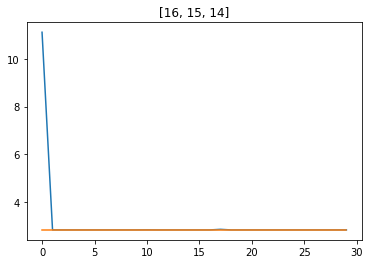

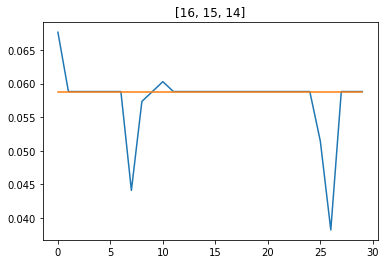

layer included till 11
Epoch 1/30
34/34 [==============================] - 12s 345ms/step - loss: 21.1867 - acc: 0.0510 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 2/30
34/34 [==============================] - 11s 335ms/step - loss: 2.8332 - acc: 0.0583 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 3/30
34/34 [==============================] - 11s 336ms/step - loss: 2.8332 - acc: 0.0525 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 4/30
34/34 [==============================] - 12s 340ms/step - loss: 2.8332 - acc: 0.0466 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 5/30
34/34 [==============================] - 11s 333ms/step - loss: 2.8332 - acc: 0.0724 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 6/30
34/34 [==============================] - 11s 336ms/step - loss: 2.8332 - acc: 0.0525 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 7/30
34/34 [==============================] - 12s 350ms/step - loss: 2.8332 - acc: 0.0647 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 8/30
34/34 [===========================

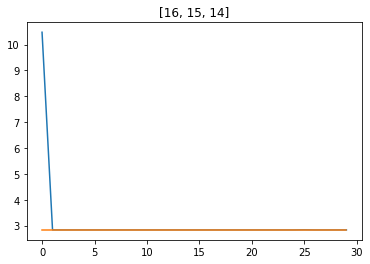

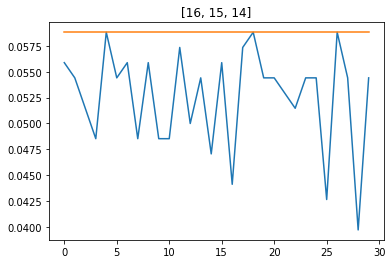

layer included till 11
Epoch 1/30
34/34 [==============================] - 13s 353ms/step - loss: 15.2496 - acc: 0.1193 - val_loss: 2.8322 - val_acc: 0.0588
Epoch 2/30
34/34 [==============================] - 12s 348ms/step - loss: 2.8458 - acc: 0.0462 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 3/30
34/34 [==============================] - 12s 345ms/step - loss: 2.8288 - acc: 0.0709 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 4/30
34/34 [==============================] - 12s 342ms/step - loss: 2.8304 - acc: 0.0571 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 5/30
34/34 [==============================] - 12s 344ms/step - loss: 2.8313 - acc: 0.0666 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 6/30
34/34 [==============================] - 12s 341ms/step - loss: 2.8283 - acc: 0.0572 - val_loss: 2.8325 - val_acc: 0.0588
Epoch 7/30
34/34 [==============================] - 12s 346ms/step - loss: 2.8071 - acc: 0.0515 - val_loss: 2.8257 - val_acc: 0.0706
Epoch 8/30
34/34 [===========================

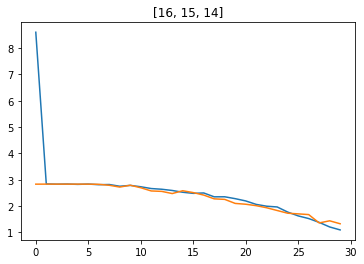

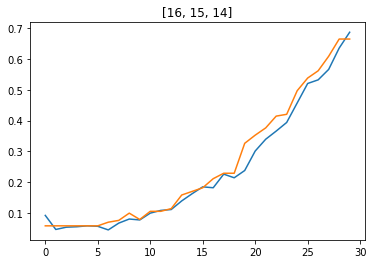

layer included till 11
Epoch 1/30
34/34 [==============================] - 12s 350ms/step - loss: 4.7781 - acc: 0.2899 - val_loss: 0.7026 - val_acc: 0.8471
Epoch 2/30
34/34 [==============================] - 12s 343ms/step - loss: 0.5371 - acc: 0.8346 - val_loss: 0.4082 - val_acc: 0.8971
Epoch 3/30
34/34 [==============================] - 12s 351ms/step - loss: 0.1360 - acc: 0.9530 - val_loss: 0.3864 - val_acc: 0.9176
Epoch 4/30
34/34 [==============================] - 12s 347ms/step - loss: 0.1011 - acc: 0.9679 - val_loss: 0.3456 - val_acc: 0.9235
Epoch 5/30
34/34 [==============================] - 12s 343ms/step - loss: 0.0786 - acc: 0.9749 - val_loss: 0.3612 - val_acc: 0.9206
Epoch 6/30
34/34 [==============================] - 12s 343ms/step - loss: 0.0164 - acc: 0.9925 - val_loss: 0.3469 - val_acc: 0.9324
Epoch 7/30
34/34 [==============================] - 12s 341ms/step - loss: 0.0288 - acc: 0.9890 - val_loss: 0.3786 - val_acc: 0.9324
Epoch 8/30
34/34 [============================

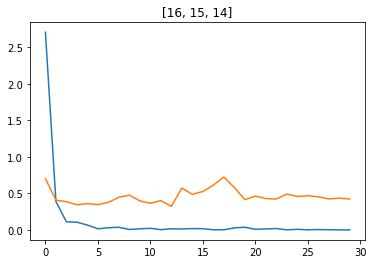

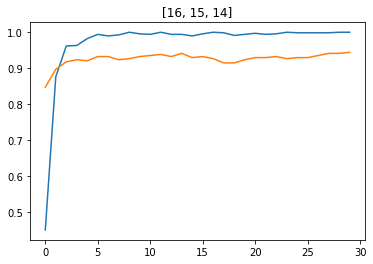

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

# model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
overall_acc_dr=[]
overall_val_acc_dr=[]
overall_loss_dr=[]
overall_val_loss_dr=[]
overall_epochs_dr=[]
pop_range=[[],[10,13],[10,11,13],[10,11,12,13]]

for i in pop_range:
  if len(i)!=0:
    print("layer included till",i[0]+1 )
  else:
    print("layer included till 10")
  model_pop_conv_layer= models.Sequential()
  
  for j in range(10):
    model_pop_conv_layer.add(model_1.layers[j])

  for j in i:
    model_pop_conv_layer.add(model_1.layers[j])

  

  model_pop_conv_layer.add(Dropout(0.5))
  model_pop_conv_layer.add(layers.Flatten())
  model_pop_conv_layer.add(layers.Dense(64, activation='relu'))
 
#  model_pop_conv_layer.add(layers.Dense(128, activation='relu'))
  
  model_pop_conv_layer.add(layers.Dense(17, activation='softmax'))

  # checkpoint_path='/content/gdrive/MyDrive/Weights_save_final/weights_final.{epoch:02d}-{val_loss:.2f}.hdf5'
  # checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_acc", verbose=0, save_best_only=True, save_weights_only=False,period=1)

  model_pop_conv_layer.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
  
  
  history_fr= model_pop_conv_layer.fit_generator(train_generator,
      steps_per_epoch=34, 
        epochs=30,
        validation_data=validation_generator,
        validation_steps=17 )
  
  # print(x,"\n",model_pop_conv_layer.summary())
  acc = history_fr.history['acc']
  val_acc = history_fr.history['val_acc']
  loss = history_fr.history['loss']
  val_loss = history_fr.history['val_loss']
  epochs = range(len(acc))

  overall_acc_dr.append(acc)
  overall_val_acc_dr.append(val_acc)
  overall_loss_dr.append(loss)
  overall_val_loss_dr.append(val_loss)
  overall_epochs_dr.append(epochs)

  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title(str (i))
  plt.show()
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title(str (i))
  plt.show()
  keras.backend.clear_session()

In [ ]:
# last_10_vall_acc= 
print("For layer 64")
for i in range(4):
  print("add",i,"- ",end="")
  for j in range(20,30):
    print(np.round(10*overall_val_acc_dr[i][j],1),end=",")
  print("\t",np.round(np.average (overall_val_acc_dr[i][20:29]),2))
  print("\n")

For layer 64
add 0 - 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,	 0.06


add 1 - 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,	 0.06


add 2 - 3.5,3.8,4.1,4.2,5.0,5.4,5.6,6.1,6.6,6.6,	 0.49


add 3 - 9.3,9.3,9.3,9.3,9.3,9.3,9.4,9.4,9.4,9.4,	 0.93




layer included till 10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
34/34 [==============================] - 13s 355ms/step - loss: 35.1221 - acc: 0.0590 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 2/30
34/34 [==============================] - 12s 342ms/step - loss: 2.8332 - acc: 0.0601 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 3/30
34/34 [==============================] - 11s 337ms/step - loss: 2.8314 - acc: 0.0599 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 4/30
34/34 [==============================] - 11s 334ms/step - loss: 2.8333 - acc: 0.0523 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 5/30
34/34 [==============================] - 11s 335ms/step - loss: 2.8333 - acc: 0.0661 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 6/30
34/34 [==============================] - 11s 339ms/step - loss: 2.8332 - acc: 0.0447 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 7/30
34/34 [==============================] - 11s 335ms/step - loss: 2.8332 - acc: 0.0578 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 8/30
34/34 [==============================] - 11s 336ms/step -

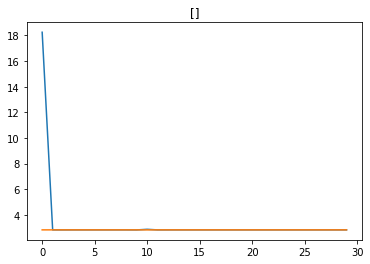

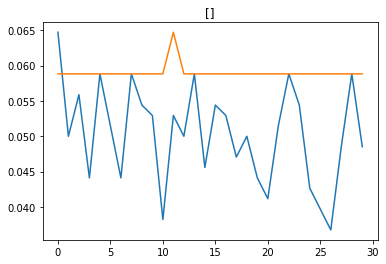

layer included till 11
Epoch 1/30
34/34 [==============================] - 12s 342ms/step - loss: 21.7244 - acc: 0.0655 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 2/30
34/34 [==============================] - 11s 338ms/step - loss: 2.8332 - acc: 0.0737 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 3/30
34/34 [==============================] - 11s 333ms/step - loss: 2.8332 - acc: 0.0491 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 4/30
34/34 [==============================] - 11s 336ms/step - loss: 2.8317 - acc: 0.0597 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 5/30
34/34 [==============================] - 11s 336ms/step - loss: 2.8332 - acc: 0.0374 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 6/30
34/34 [==============================] - 11s 334ms/step - loss: 2.8332 - acc: 0.0487 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 7/30
34/34 [==============================] - 11s 336ms/step - loss: 2.8332 - acc: 0.0577 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 8/30
34/34 [===========================

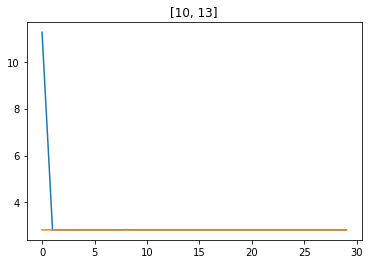

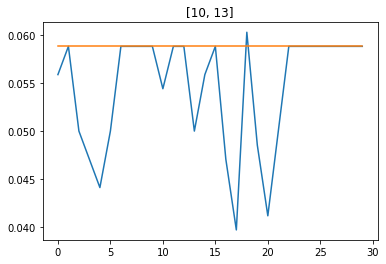

layer included till 11
Epoch 1/30
34/34 [==============================] - 12s 345ms/step - loss: 7.0729 - acc: 0.1056 - val_loss: 2.4321 - val_acc: 0.2059
Epoch 2/30
34/34 [==============================] - 11s 334ms/step - loss: 2.2822 - acc: 0.2322 - val_loss: 1.7057 - val_acc: 0.4853
Epoch 3/30
34/34 [==============================] - 11s 339ms/step - loss: 1.6021 - acc: 0.5174 - val_loss: 1.1332 - val_acc: 0.6794
Epoch 4/30
34/34 [==============================] - 12s 340ms/step - loss: 1.0314 - acc: 0.6904 - val_loss: 0.9592 - val_acc: 0.7529
Epoch 5/30
34/34 [==============================] - 11s 333ms/step - loss: 0.6678 - acc: 0.7943 - val_loss: 0.7369 - val_acc: 0.8147
Epoch 6/30
34/34 [==============================] - 11s 334ms/step - loss: 0.4253 - acc: 0.8725 - val_loss: 0.7337 - val_acc: 0.8147
Epoch 7/30
34/34 [==============================] - 12s 340ms/step - loss: 0.3269 - acc: 0.8956 - val_loss: 0.5385 - val_acc: 0.8618
Epoch 8/30
34/34 [============================

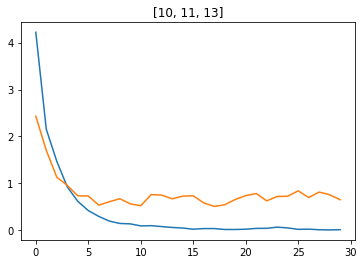

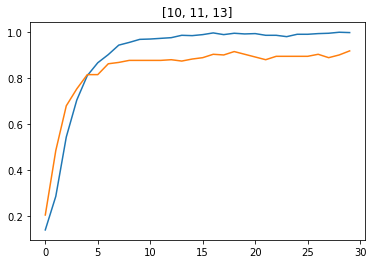

layer included till 11
Epoch 1/30
34/34 [==============================] - 12s 346ms/step - loss: 5.2378 - acc: 0.2650 - val_loss: 1.1057 - val_acc: 0.6412
Epoch 2/30
34/34 [==============================] - 12s 339ms/step - loss: 0.7659 - acc: 0.7792 - val_loss: 0.5219 - val_acc: 0.8559
Epoch 3/30
34/34 [==============================] - 12s 343ms/step - loss: 0.1307 - acc: 0.9644 - val_loss: 0.4047 - val_acc: 0.8912
Epoch 4/30
34/34 [==============================] - 11s 338ms/step - loss: 0.0483 - acc: 0.9851 - val_loss: 0.3870 - val_acc: 0.9029
Epoch 5/30
34/34 [==============================] - 12s 343ms/step - loss: 0.0348 - acc: 0.9884 - val_loss: 0.3878 - val_acc: 0.9088
Epoch 6/30
34/34 [==============================] - 12s 342ms/step - loss: 0.0217 - acc: 0.9970 - val_loss: 0.3774 - val_acc: 0.9147
Epoch 7/30
34/34 [==============================] - 11s 339ms/step - loss: 0.0087 - acc: 0.9959 - val_loss: 0.4002 - val_acc: 0.9206
Epoch 8/30
34/34 [============================

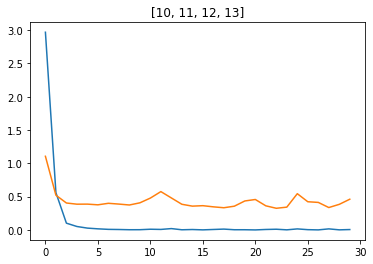

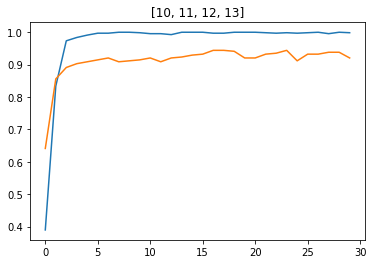

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

# model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
overall_acc_dr=[]
overall_val_acc_dr=[]
overall_loss_dr=[]
overall_val_loss_dr=[]
overall_epochs_dr=[]
pop_range=[[],[10,13],[10,11,13],[10,11,12,13]]

for i in pop_range:
  if len(i)!=0:
    print("layer included till",i[0]+1 )
  else:
    print("layer included till 10")
  model_pop_conv_layer= models.Sequential()
  
  for j in range(10):
    model_pop_conv_layer.add(model_1.layers[j])

  for j in i:
    model_pop_conv_layer.add(model_1.layers[j])

  

  model_pop_conv_layer.add(Dropout(0.3))
  model_pop_conv_layer.add(layers.Flatten())
  model_pop_conv_layer.add(layers.Dense(64, activation='relu'))
 
#  model_pop_conv_layer.add(layers.Dense(128, activation='relu'))
  
  model_pop_conv_layer.add(layers.Dense(17, activation='softmax'))

  # checkpoint_path='/content/gdrive/MyDrive/Weights_save_final/weights_final.{epoch:02d}-{val_loss:.2f}.hdf5'
  # checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_acc", verbose=0, save_best_only=True, save_weights_only=False,period=1)

  model_pop_conv_layer.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
  
  
  history_fr= model_pop_conv_layer.fit_generator(train_generator,
      steps_per_epoch=34, 
        epochs=30,
        validation_data=validation_generator,
        validation_steps=17 )
  
  # print(x,"\n",model_pop_conv_layer.summary())
  acc = history_fr.history['acc']
  val_acc = history_fr.history['val_acc']
  loss = history_fr.history['loss']
  val_loss = history_fr.history['val_loss']
  epochs = range(len(acc))

  overall_acc_dr.append(acc)
  overall_val_acc_dr.append(val_acc)
  overall_loss_dr.append(loss)
  overall_val_loss_dr.append(val_loss)
  overall_epochs_dr.append(epochs)

  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title(str (i))
  plt.show()
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title(str (i))
  plt.show()
  keras.backend.clear_session()

In [ ]:
# last_10_vall_acc= 
print("freeze layer 64")
for i in range(4):
  print("add",i,"- ",end="")
  for j in range(20,30):
    print(np.round(10*overall_val_acc_dr[i][j],1),end=",")
  print("\t",np.round(np.average (overall_val_acc_dr[i][20:29]),2))
  print("\n")

For layer 64
add 0 - 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,	 0.06


add 1 - 0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,	 0.06


add 2 - 8.9,8.8,8.9,8.9,8.9,8.9,9.0,8.9,9.0,9.2,	 0.89


add 3 - 9.2,9.3,9.4,9.4,9.1,9.3,9.3,9.4,9.4,9.2,	 0.93




layer included till 10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
34/34 [==============================] - 13s 359ms/step - loss: 2.3512 - acc: 0.2886 - val_loss: 1.7784 - val_acc: 0.4912
Epoch 2/30
34/34 [==============================] - 12s 351ms/step - loss: 1.4439 - acc: 0.5550 - val_loss: 1.2761 - val_acc: 0.6382
Epoch 3/30
34/34 [==============================] - 12s 351ms/step - loss: 1.1902 - acc: 0.6279 - val_loss: 1.0998 - val_acc: 0.6647
Epoch 4/30
34/34 [==============================] - 12s 350ms/step - loss: 0.8940 - acc: 0.7246 - val_loss: 1.0765 - val_acc: 0.7000
Epoch 5/30
34/34 [==============================] - 12s 352ms/step - loss: 0.8175 - acc: 0.7315 - val_loss: 1.0123 - val_acc: 0.6912
Epoch 6/30
34/34 [==============================] - 12s 351ms/step - loss: 0.6158 - acc: 0.8205 - val_loss: 0.8194 - val_acc: 0.7618
Epoch 7/30
34/34 [==============================] - 12s 353ms/step - loss: 0.6204 - acc: 0.7984 - val_loss: 0.9430 - val_acc: 0.7000
Epoch 8/30
34/34 [==============================] - 12s 354ms/step - 

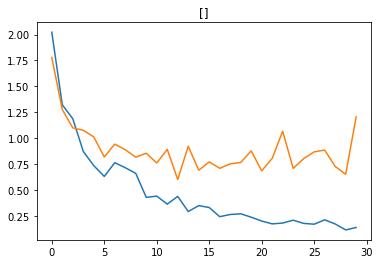

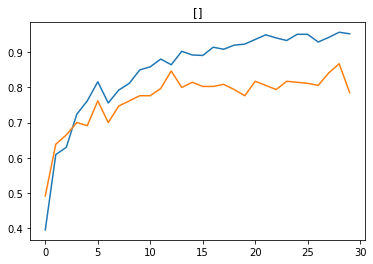

layer included till 11
Epoch 1/30
34/34 [==============================] - 13s 359ms/step - loss: 2.7655 - acc: 0.2223 - val_loss: 1.3555 - val_acc: 0.5941
Epoch 2/30
34/34 [==============================] - 12s 350ms/step - loss: 1.2841 - acc: 0.5971 - val_loss: 1.0494 - val_acc: 0.6765
Epoch 3/30
34/34 [==============================] - 12s 343ms/step - loss: 0.9261 - acc: 0.7281 - val_loss: 0.9986 - val_acc: 0.7118
Epoch 4/30
34/34 [==============================] - 12s 347ms/step - loss: 0.6733 - acc: 0.7603 - val_loss: 0.7832 - val_acc: 0.8000
Epoch 5/30
34/34 [==============================] - 12s 351ms/step - loss: 0.5456 - acc: 0.8318 - val_loss: 0.7598 - val_acc: 0.7647
Epoch 6/30
34/34 [==============================] - 12s 352ms/step - loss: 0.4739 - acc: 0.8483 - val_loss: 0.9336 - val_acc: 0.7471
Epoch 7/30
34/34 [==============================] - 12s 350ms/step - loss: 0.4615 - acc: 0.8520 - val_loss: 0.9133 - val_acc: 0.7618
Epoch 8/30
34/34 [============================

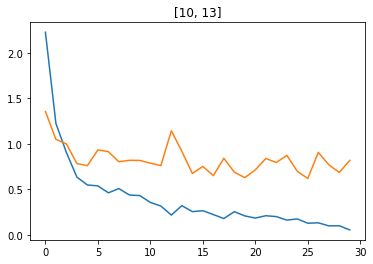

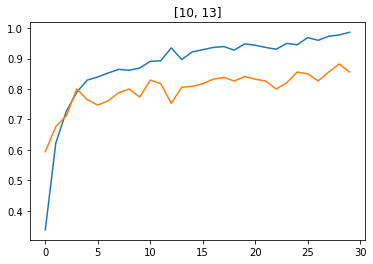

layer included till 11
Epoch 1/30
34/34 [==============================] - 13s 360ms/step - loss: 2.0429 - acc: 0.3483 - val_loss: 0.7546 - val_acc: 0.7559
Epoch 2/30
34/34 [==============================] - 12s 349ms/step - loss: 0.6170 - acc: 0.8114 - val_loss: 0.5784 - val_acc: 0.8147
Epoch 3/30
34/34 [==============================] - 12s 349ms/step - loss: 0.3041 - acc: 0.8962 - val_loss: 0.7811 - val_acc: 0.8206
Epoch 4/30
34/34 [==============================] - 12s 348ms/step - loss: 0.2575 - acc: 0.9112 - val_loss: 0.6130 - val_acc: 0.8324
Epoch 5/30
34/34 [==============================] - 12s 349ms/step - loss: 0.2012 - acc: 0.9296 - val_loss: 0.6625 - val_acc: 0.8412
Epoch 6/30
34/34 [==============================] - 12s 355ms/step - loss: 0.1889 - acc: 0.9504 - val_loss: 0.6894 - val_acc: 0.8324
Epoch 7/30
34/34 [==============================] - 12s 345ms/step - loss: 0.2111 - acc: 0.9371 - val_loss: 0.7723 - val_acc: 0.8176
Epoch 8/30
34/34 [============================

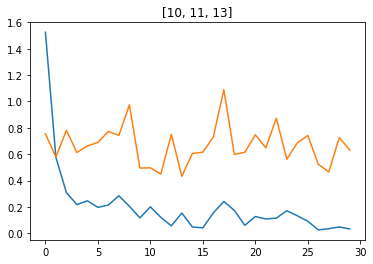

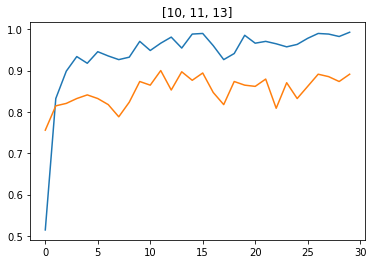

layer included till 11
Epoch 1/30
34/34 [==============================] - 13s 364ms/step - loss: 1.8656 - acc: 0.4926 - val_loss: 0.8001 - val_acc: 0.7735
Epoch 2/30
34/34 [==============================] - 12s 355ms/step - loss: 0.2575 - acc: 0.9340 - val_loss: 0.9170 - val_acc: 0.7912
Epoch 3/30
34/34 [==============================] - 12s 352ms/step - loss: 0.2622 - acc: 0.9222 - val_loss: 0.7502 - val_acc: 0.8118
Epoch 4/30
34/34 [==============================] - 12s 354ms/step - loss: 0.2515 - acc: 0.9295 - val_loss: 0.7584 - val_acc: 0.8824
Epoch 5/30
34/34 [==============================] - 12s 352ms/step - loss: 0.1406 - acc: 0.9548 - val_loss: 0.8359 - val_acc: 0.8235
Epoch 6/30
34/34 [==============================] - 12s 353ms/step - loss: 0.2846 - acc: 0.9151 - val_loss: 0.7423 - val_acc: 0.8824
Epoch 7/30
34/34 [==============================] - 12s 352ms/step - loss: 0.1836 - acc: 0.9527 - val_loss: 0.9516 - val_acc: 0.8088
Epoch 8/30
34/34 [============================

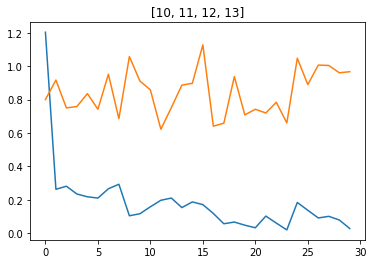

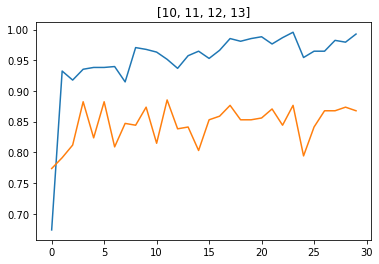

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

# model_1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
overall_acc_dr=[]
overall_val_acc_dr=[]
overall_loss_dr=[]
overall_val_loss_dr=[]
overall_epochs_dr=[]
pop_range=[[],[10,13],[10,11,13],[10,11,12,13]]

for i in pop_range:
  if len(i)!=0:
    print("layer included till",i[0]+1 )
  else:
    print("layer included till 10")
  model_pop_conv_layer= models.Sequential()
  
  for j in range(10):
    model_pop_conv_layer.add(conv_base.layers [j])

  for layer in model_pop_conv_layer.layers:
    layer.trainable=True

  for j in i:
    model_pop_conv_layer.add(model_1.layers[j])

 

  model_pop_conv_layer.add(Dropout(0.3))
  model_pop_conv_layer.add(layers.Flatten())
  model_pop_conv_layer.add(layers.Dense(64, activation='relu'))
 
#  model_pop_conv_layer.add(layers.Dense(128, activation='relu'))
  
  model_pop_conv_layer.add(layers.Dense(17, activation='softmax'))

  # checkpoint_path='/content/gdrive/MyDrive/Weights_save_final/weights_final.{epoch:02d}-{val_loss:.2f}.hdf5'
  # checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_acc", verbose=0, save_best_only=True, save_weights_only=False,period=1)

  model_pop_conv_layer.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
  
  
  history_fr= model_pop_conv_layer.fit_generator(train_generator,
      steps_per_epoch=34, 
        epochs=30,
        validation_data=validation_generator,
        validation_steps=17 )
  
  # print(x,"\n",model_pop_conv_layer.summary())
  acc = history_fr.history['acc']
  val_acc = history_fr.history['val_acc']
  loss = history_fr.history['loss']
  val_loss = history_fr.history['val_loss']
  epochs = range(len(acc))

  overall_acc_dr.append(acc)
  overall_val_acc_dr.append(val_acc)
  overall_loss_dr.append(loss)
  overall_val_loss_dr.append(val_loss)
  overall_epochs_dr.append(epochs)

  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title(str (i))
  plt.show()
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title(str (i))
  plt.show()
  keras.backend.clear_session()

In [ ]:
# last_10_vall_acc= 
print("non freeze layer 64")
for i in range(4):
  print("add",i,"- ",end="")
  for j in range(20,30):
    print(np.round(10*overall_val_acc_dr[i][j],1),end=",")
  print("\t",np.round(np.average (overall_val_acc_dr[i][20:29]),2))
  print("\n")

non freeze layer 64
add 0 - 8.2,8.1,7.9,8.2,8.1,8.1,8.1,8.4,8.7,7.9,	 0.82


add 1 - 8.3,8.3,8.0,8.2,8.6,8.5,8.3,8.6,8.8,8.6,	 0.84


add 2 - 8.6,8.8,8.1,8.7,8.3,8.6,8.9,8.9,8.7,8.9,	 0.86


add 3 - 8.6,8.7,8.4,8.8,7.9,8.4,8.7,8.7,8.7,8.7,	 0.85




Running only VGG

In [ ]:
model_vgg = models.Sequential()
model_vgg.add(conv_base)
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(17, activation='softmax'))

In [ ]:
model_vgg.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [ ]:
history_vgg= model_vgg.fit_generator(
      train_generator,
      steps_per_epoch=34,
      epochs=50,
      verbose=2,
      validation_data= validation_generator,
      validation_steps=17)

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

# Load the CONV layers of VGG16 model and add the FC layers
from keras.layers import Dropout
model = models.Sequential()
model.add(conv_base)
#model.pop()
model.add(layers.Flatten())
model.add(Dropout(0.1))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=34,
      epochs=50,
      verbose=2,
      validation_data= validation_generator,
      validation_steps=17)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


34/34 - 8s - loss: 2.1480 - acc: 0.4059 - val_loss: 1.2300 - val_acc: 0.6088
Epoch 2/50
34/34 - 7s - loss: 0.6939 - acc: 0.7824 - val_loss: 0.9325 - val_acc: 0.6941
Epoch 3/50
34/34 - 7s - loss: 0.2588 - acc: 0.9176 - val_loss: 0.9113 - val_acc: 0.7500
Epoch 4/50
34/34 - 7s - loss: 0.1633 - acc: 0.9500 - val_loss: 0.8840 - val_acc: 0.7500
Epoch 5/50
34/34 - 7s - loss: 0.2309 - acc: 0.9471 - val_loss: 1.3808 - val_acc: 0.6412
Epoch 6/50
34/34 - 7s - loss: 0.1500 - acc: 0.9544 - val_loss: 1.1977 - val_acc: 0.7500
Epoch 7/50
34/34 - 7s - loss: 0.0694 - acc: 0.9750 - val_loss: 1.2496 - val_acc: 0.6971
Epoch 8/50
34/34 - 7s - loss: 0.0605 - acc: 0.9824 - val_loss: 1.3109 - val_acc: 0.7676
Epoch 9/50
34/34 - 7s - loss: 0.2706 - acc: 0.9147 - val_loss: 0.9066 - val_acc: 0.7588
Epoch 10/50
34/34 - 7s - loss: 0.1098 - acc: 0.9544 - val_loss: 1.1627 - val_acc: 0.7559
Epoch 11/50
34/34 - 7s - loss: 0.0338 - acc: 0.9882 - val_loss: 1.0643 - val_acc: 0.7882
Epoch 12/50
34/34 - 7s - loss: 0.0171 - a

ValueError: ignored

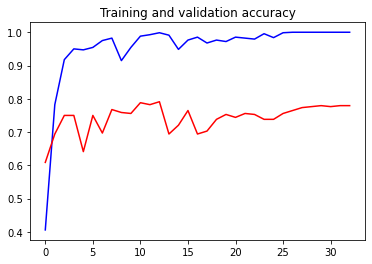

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_vgg = history_vgg.history['acc']
val_acc_vgg = history_vgg.history['val_acc']
loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']

epochs_vgg = range(len(acc_vgg))


epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.plot(epochs, acc_vgg, 'y', label='Training accuracy')
plt.plot(epochs, val_acc_vgg, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')


plt.plot(epochs, loss_vgg, 'y', label='Training Loss')
plt.plot(epochs, val_loss_vgg, 'y', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()



plt.show()

In [ ]:
dict_clas= train_generator.class_indices
name_map={
    0:"Bluebell",
    1:"Buttercup",
    2:"ColtsFoot",
    3:"Cowslip",
    4:"Crocus",
    5:"Daffodil",
    6:"Daisy",
    7:"Dandelion",
    8:"Fritillary",
    9:"Iris",
    10:"LilyValley",
    11:"Pansy",
    12:"Snowdrop",
    13:"Sunflower",
    14:"Tigerlily",
    15:"Tulip",
    16:"Windflower",
}
x="/content/gdrive/MyDrive/A2/test"
right=0
total=0
name=[]
pred=[]
real=[]
for i in os.listdir(x):
  print("=============================================================")
  print(i, dict_clas[i])
  y=x+"/"+i
  nan=[]
  table=np.array(nan)
  for j in os.listdir(y):
    z=x+"/"+i+"/"+j
    image = load_img(z, target_size=(224, 224,3))
    d_image=image
    image = img_to_array(image) 
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image=image/255.0
    yhat = model.predict(image)
    zhat=model.predict_classes(image)
    d=np.array(yhat[0])
#    print("\t",zhat[0])
    table= np.append(table, zhat[0])
    if (name_map[np.argmax(d)]==i):
    #  print("yes")
      right+=1
      total+=1

    else:
#      print("")
      total+=1
      print(j)
      opp="Real-"+i+"\nPredicted-"+name_map[zhat[0]]
      plt.imshow(d_image)
      plt.title(opp)
      plt.show()
  op=(np.unique(table, return_counts=True))
  print(op[0])
  print(op[1])
    
   

In [ ]:
print("Testing accuracy=",right/total)

In [ ]:

model_try = models.Sequential()
model_try.add(conv_base)
#model.pop()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

In [ ]:
model_try.summary()

In [ ]:
conv_base.summary()

In [ ]:
x=[2,3,4,5,6,7]
conv_base.layers.pop(-1)
conv_base.layers.pop(-2)
conv_base.layers.pop(-3)
conv_base.layers.pop(-4)

conv_base.summary()

In [ ]:
model_try.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [ ]:
model_try.summary()

In [ ]:
from keras.applications import VGG16
conv_base3=VGG16(weights='imagenet',include_top=False, input_shape=(150,150,3))

In [ ]:
conv_base3.summary()

In [ ]:
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        multiple                  1792      
_________________________________________________________________
block1_conv2 (Conv2D)        multiple                  36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block2_conv1 (Conv2D)        multiple                  73856     
_________________________________________________________________
block2_conv2 (Conv2D)        multiple                  147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block3_conv1 (Conv2D)        multiple                 

model_check2 = models.Sequential()
model_check3 = models.Sequential()
model_check4 = models.Sequential()
model_check5 = models.Sequential()


In [ ]:
model_check2 = models.Sequential()
model_check3 = models.Sequential()
model_check4 = models.Sequential()
model_check5 = models.Sequential()
model_check6 = models.Sequential()
model_check7 = models.Sequential()


In [ ]:
#model_check6.add( conv_base3.layers[0](input_shape=(150,150,3)))
layer=conv_base3.layers[0]

In [ ]:
model_check3.add(conv_base3)

In [ ]:
model_check3.input_shape(120)

In [ ]:
model_check3.add(conv_base3.layers[0])

In [ ]:
for layer in conv_base3.layers[0:15]:
  model_check4.add(layer)

In [ ]:
model_check4.summary()

In [ ]:
model_check9=models.Sequential()


In [ ]:
for layer in conv_base3.layers[0:15]:
  model_check9.add(layer)

In [ ]:
model_check9.summary()

In [ ]:
model_check9.input_shape

In [ ]:
model_check9.add(layers.Flatten())
model_check9.add(layers.Dense(256, activation='relu'))
model_check9.add(layers.Dense(17, activation='softmax'))

In [ ]:
model_check9.summary()

In [ ]:
model_check9.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

# Train the model
history = model_check9.fit_generator(
      train_generator,
      steps_per_epoch=20,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=17,  # 1000 images = batch_size * steps
      verbose=2)

In [ ]:
acc = history.history['acc']

val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_check9.summary()

In [ ]:
from keras.applications import VGG16
x=VGG16(include_top=False)

In [ ]:
x.summary()

In [ ]:
model_check10=models.Sequential()
for layer in conv_base3.layers:
  model_check10.add(layer)

In [ ]:
model_check10.summary()

In [ ]:
model_check10.pop()
model_check10.pop()
model_check10.pop()

In [ ]:
model_check10.summary()

In [ ]:
model_last=models.Sequential()
for i in conv_base.layers:
  model_last.add(i)

In [ ]:
model_last.summary()

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D


In [ ]:
model_last.add( Conv2D(512,(4,4)))


In [ ]:
model_last.add( Conv2D(512,(2,2) ))


In [ ]:
model_last.add(MaxPool2D())

In [ ]:
model_last.summary()

In [ ]:
model_last.add(layers.Flatten())

In [ ]:
model_last.add(layers.Dense(17,activation="softmax"))
model_last.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [ ]:
history_add_conv= model_last.fit_generator(
      train_generator,
      steps_per_epoch=34,
      epochs=50,
      verbose=2,
      validation_data= validation_generator,
      validation_steps=17)

In [ ]:

val_acc = history_add_conv.history['val_acc']
loss = history_add_conv.history['loss']
val_loss = history_add_conv.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_vgg=models.Sequential()
model_vgg.add(conv_base)

In [ ]:
model_vgg.add(layers.Dense(17, activation="softmax"))


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path='/content/gdrive/MyDrive/Weights_save/weights_modified.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor="val_acc", verbose=0, save_best_only=True, save_weights_only=False,period=1)


In [ ]:
model_vgg.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
history_add_conv= model_last.fit_generator(
      train_generator,
      steps_per_epoch=34,
      epochs=2,
      verbose=2,
      validation_data= validation_generator,
      validation_steps=17,
      callbacks=[checkpoint] )

In [ ]:
from keras import models
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow import keras

x= [0,4,8]
color=["r","g","b","y","k"]
op=1
conv_base_13 = VGG16(weights='imagenet',include_top=False, input_shape=(224,224, 3))
u=5

overall_acc = []
overall_val_acc = []
overall_loss = []
overall_val_loss = []
overall_epochs = []


for i in x:
  print("Till Module",u)
  u-=1
  model_13=models.Sequential()
  for layer in conv_base_13.layers:
    model_13.add(layer)
  for j in range(i):
    model_13.pop()
  model_13.add(layers.Flatten())

  # for layer in model_13.layers:
  #   layer.trainable=False
  model_13.add(layers.Dense(17, activation='softmax'))  
  

  
  model_13.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
  
  
  

  history_13 = model_13.fit_generator(
      train_generator,
      steps_per_epoch=34,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=17,  # 1000 images = batch_size * steps
      verbose=50)
#  model_13.summary()
  acc = history_13.history['acc']
  val_acc = history_13.history['val_acc']
  loss = history_13.history['loss']
  val_loss = history_13.history['val_loss']
  epochs = range(len(acc))


  overall_acc.append(acc)
  overall_val_acc.append(val_acc)
  overall_loss.append(loss)
  overall_val_loss.append(val_loss)
  overall_epochs.append(epochs)
  


  col=color[op-1]
  
  op+=1
#  plt.plot(epochs, loss, col, label=str (r))
  plt.plot(epochs, acc, col, label=str (r))
  keras.backend.clear_session()
 

plt.show()

In [ ]:
import pandas as pd
df=pd.DataFrame()


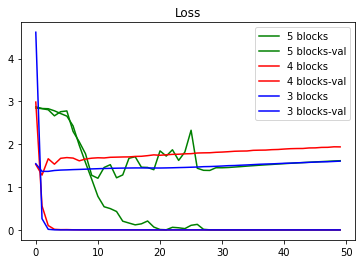

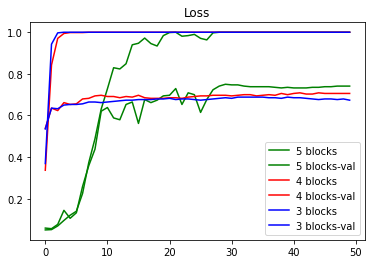

In [ ]:
name=["5 blocks","4 blocks","3 blocks"]
name_val=["5 blocks-val","4 blocks-val","3 blocks-val"]

color=["g","r","b"]
for i in range(len(x)):
  plt.plot(overall_epochs[i], overall_loss[i],color=color[i], label=name[i])
  plt.plot(overall_epochs[i], overall_val_loss[i],color=color[i], label=name_val[i])  
plt.legend()
plt.title("Loss")
plt.show()

for i in range(len(x)):
  plt.plot(overall_epochs[i], overall_acc[i],color=color[i], label=name[i])
  plt.plot(overall_epochs[i], overall_val_acc[i],color=color[i], label=name_val[i])  
plt.legend()
plt.title("Loss")
plt.show()

